**目的** 
1. 批量绘制鞋垫传感器数据
2. 将不同区域的传感器数据使用同一色系进行表示
3. 优化代码，使用一个函数绘制左右脚的图形

In [1]:
# 调用各种安装包
import os
import re
import pandas as pd
import matplotlib.pyplot as plt 
from pathlib import Path

In [2]:
# 获取文件夹路径并更改到文件夹

#获取用户输入的文件夹路径
path = Path(input("请输入鞋垫数据所在文件夹："))
#将当前工作目录更改为用户输入的路径
os.chdir(path)
#获取当前工作目录，并打印出来
cwd = os.getcwd()
print("当前文件夹路径为: {}".format(cwd))

当前文件夹路径为: /Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230423鞋垫漂移测试


In [9]:
# 新建plot 文件夹
plot_folder_name = "pressure_plot"
if not os.path.exists(plot_folder_name):
    os.mkdir(plot_folder_name)


In [4]:
#绘制图片的函数
def plot_pressure(path,plot_folder_name,file,start_index,end_index):
    # 设置画布大小
    fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(12,24))

    # 正常显示中文
    plt.rcParams['font.sans-serif'] = ['Heiti TC', 'SimHei', 'FangSong']  
    plt.rcParams['font.size'] = 12  # 字体大小
    plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号


    for leg_type in ["L","R"]:
        df = pd.read_csv(file)
        data = df[df["part"]==leg_type]
        data_filterd = data.iloc[start_index:end_index]
        if leg_type == "L":
            leg_num = 0
            cols = {
            "all": ["p1-c","p2-c","p3-c","p4-c","p5-c","p6-c","p7-c","p11-c","p12-c","p8-c","p9-c","p10-c"],
            "heel": ["p4-c","p1-c","p2-c","p3-c"],
            "mid": ["p5-c","p6-c"],
            "fore": ["p7-c","p11-c","p12-c"],
            "thumb": ["p8-c","p9-c","p10-c"]
            }
        else:
            leg_num = 1
            cols = {
            "all": ["p1-c","p2-c","p3-c","p4-c","p5-c","p6-c","p7-c","p11-c","p12-c","p8-c","p9-c","p10-c"],
            "heel": ["p9-c","p10-c","p11-c","p12-c"],
            "mid": ["p8-c","p7-c"],
            "fore": ["p6-c","p2-c","p1-c"],
            "thumb": ["p5-c","p4-c","p3-c"]
            }


        # 同一个足区使用同一色系进行表示
        colors = {
            "heel": ['#FF0000', '#FF5C5C', '#F08080', '#FFA5A5'],
            "mid": ['#4B0082', '#8B00FF'],
            "fore": ['#3274b5', '#479ff8', '#73bff9'],
            "thumb": ['#0000FF', '#7F7FFF', '#A9A9FF']
            }


        for i, plot_type in enumerate(["all","all","heel","mid","fore","thumb"]):
            if i == 0:
                # 子图的标题
                axs[i][leg_num].set_title(f"{leg_type}_All sensors")
                data_filterd[cols[plot_type]].sum(axis=1).plot(ax=axs[i][leg_num])
            elif i == 1:
                # 子图的标题
                axs[i][leg_num].set_title(f"{leg_type}_All sensors")
                data_filterd[cols[plot_type]].plot(ax=axs[i][leg_num])

            else:
                #子图的标题
                axs[i][leg_num].set_title(f"{leg_type}_{plot_type.capitalize()}")
                data_filterd.loc[:,cols[plot_type]].plot(ax=axs[i][leg_num],color=colors[plot_type])

    # 设置图片名称
    regex = "(.*)_(.*)_(.*)"
    plot_name = re.search(regex,file)[2]
    #设定标题的名字 y是调整标题距离画布的距离
    plt.suptitle(plot_name, fontsize=16,y=0.92)
    plt.subplots_adjust(top=0.9,bottom=0.1)

    #保存图片
    #确认储存路径
    plot_path = os.path.join(path,plot_folder_name,plot_name)
    plt.savefig(plot_path + ".png")
    #plt.close()

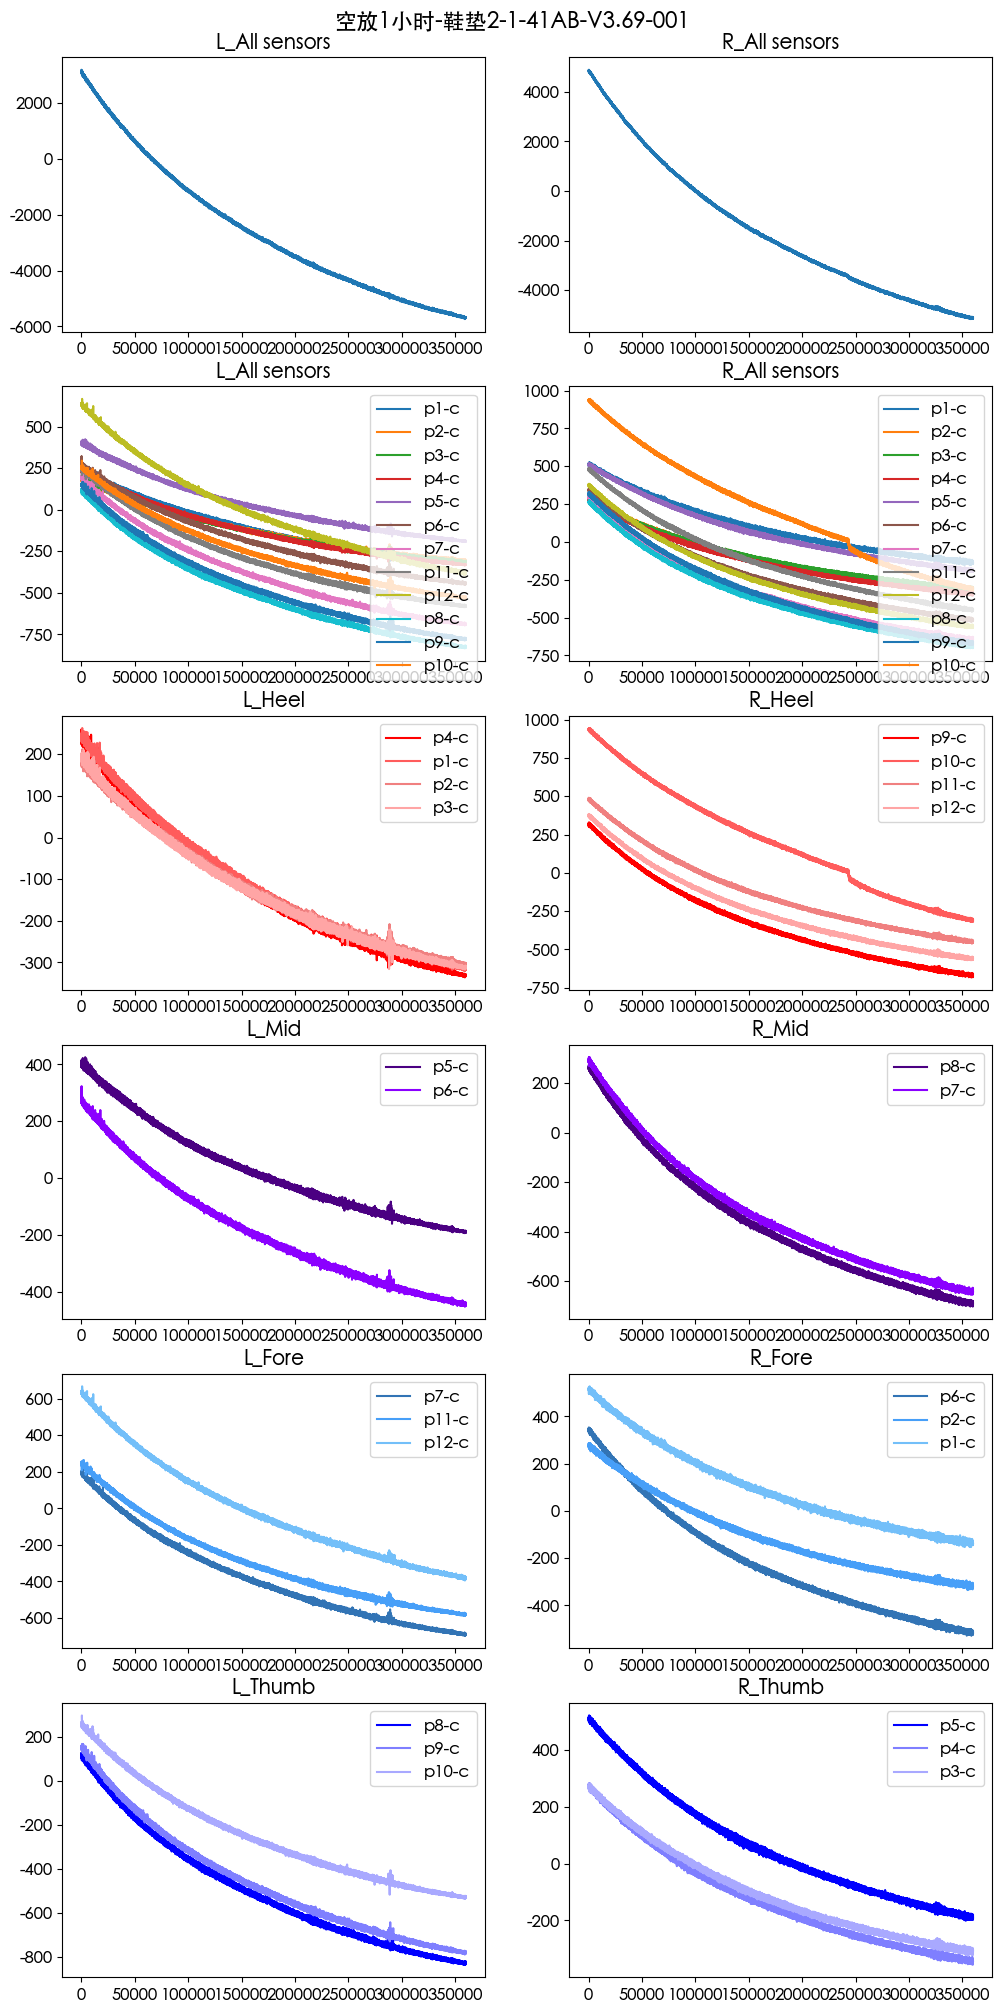

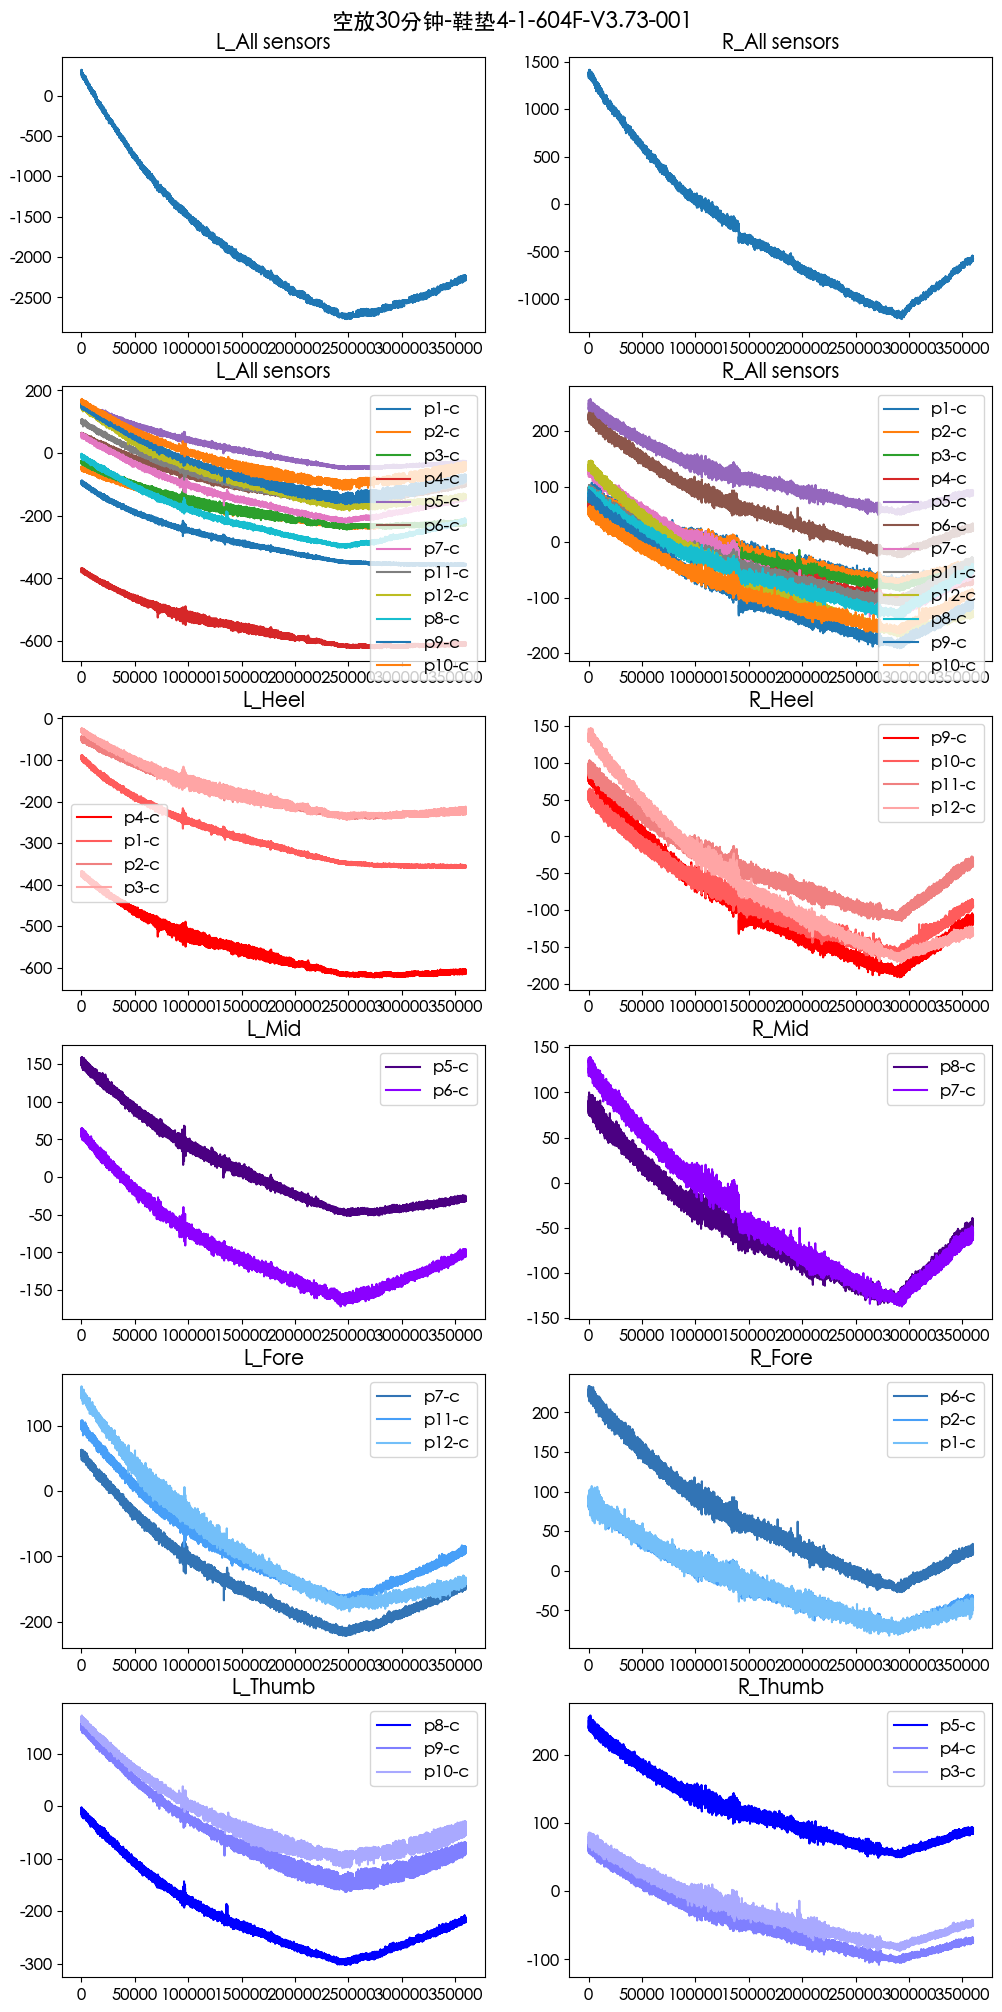

In [10]:
# 批量绘制文件的图片
for file in os.listdir(path):
    if ".csv" in file:
        df = pd.read_csv(file)
        start_index = 0
        end_index =df.shape[0]
        plot_pressure(path,plot_folder_name,file,start_index,end_index)